# 前言
这个是在jupyter中写的，步骤
   - 安装官方的python
   - pip install pipenv
   - 进入某一个文件夹，复制本文件到这个文件夹，打开终端，然后运行 pipenv install jupyter torch torchvision torchaudio matplotlib
   - 然后在终端中运行 pipenv run jupyter-lab.exe
   - 打开这个文件，然后左边有一个“Table of Contents”（图标是三个点加上三个横线），是章节目录，方便快读的到达相关的章节。

我这里用pipenv，好处是库是隔离的。

我看了那个[60分钟快速入门 PyTorch](https://zhuanlan.zhihu.com/p/66543791#:~:text=60%E5%88%86%E9%92%9F%E5%BF%AB%E9%80%9F%E5%85%A5%E9%97%A8%20PyTorch%201%201.%20Pytorch%20%E6%98%AF%E4%BB%80%E4%B9%88%20Pytorch%20%E6%98%AF%E4%B8%80%E4%B8%AA%E5%9F%BA%E4%BA%8E,...%208%201.3.2%20Numpy%20%E6%95%B0%E7%BB%84%E8%BD%AC%E6%8D%A2%E4%B8%BA%20Tensor%20...%20%E6%9B%B4%E5%A4%9A%E9%A1%B9%E7%9B%AE) , 文中说翻译自 [DEEP LEARNING WITH PYTORCH: A 60 MINUTE BLITZ](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html),两个版本是不同的，我这里也写一下我的版本吧，这个是根据官方的原版做了大幅的精简。

# tensor
tensor是基本的数据类型，类似numpy的N维数组（事实上他们的内存是公用的），参数结果等，都是用这个数据类型来表示的。



## 初始化

### 用数据初始化
这个会自动推断类型

In [1]:
import torch
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
x_data


tensor([[1, 2],
        [3, 4]])

### 用Numpy的array来初始化
他们实际上是公用内存空间的，改变了一个，另一个也改变

In [2]:
import numpy as np
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

In [3]:
# 这里修改一下一个，看看另一个是否改变
np_array[0,0]=5   # 二维数组的索引是这样子写
print(np_array)   # 看看改变结果
print(x_np)       # 看看另一个是否同步改变

[[5 2]
 [3 4]]
tensor([[5, 2],
        [3, 4]], dtype=torch.int32)


### 用其他的tensor来初始化
like表示创建一样维度的。

In [4]:
x_ones = torch.ones_like(x_data)                      # 数据全是1的，维度同x_data
x_rand = torch.rand_like(x_data, dtype=torch.float)   # 数据是随机的，可以指定类型，维度同x_data
print(x_ones)
print(x_rand)

tensor([[1, 1],
        [1, 1]])
tensor([[0.6806, 0.2035],
        [0.1210, 0.5159]])


### 用随机数或者固定值来初始化

In [5]:
shape = (2, 3,)                      # 维度
rand_tensor = torch.rand(shape)      # 随机数
ones_tensor = torch.ones(shape)      # 全是1
zeros_tensor = torch.zeros(shape)    # 全是0
print(rand_tensor)
print(ones_tensor)
print(zeros_tensor)

tensor([[0.4005, 0.6819, 0.6445],
        [0.4910, 0.6562, 0.5698]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


## tensor的属性

In [6]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")              # 维度
print(f"Datatype of tensor: {tensor.dtype}")           # 数据类型
print(f"Device tensor is stored on: {tensor.device}")  # cpu还是gpu

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## tensor的操作
悲愤，我的笔记本电脑是多年前的，cuda是8.0版本，而现在最新pytorch版本的最低cuda支持版本好像是10（好像更高），但我现在的数据量，用cpu也是可以的，以后如果用gpu，那么用如下的转换

In [7]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')                             # 转成cuda了
  print(f"Device tensor is stored on: {tensor.device}")

### 索引和切片

In [8]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0            # 冒号左边是行，右边是列，更准确是从左边数，第一个是一维，第二个是2维
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


### 题外话，关于numpy的维度
简单点，最外边的一层是1维，其次是2维...但dim的参数维度，是从0开始的，也就是减去1.  

### 拼接
有两种拼接，cat和stack 

#### cat

In [9]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)
t2 = torch.cat([tensor, tensor, tensor], dim=0)
print(t2)
# 可以看到拼接的地方不同，0表示最外城拼接，而1表示稍微内层拼接。

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


#### stack
沿着一个新维度对输入张量序列进行连接。 序列中所有的张量都应该为相同形状。  
简单说是将2维连接成3维的，以此类推，而cat，维度是相同的。 

In [10]:
t1 = torch.tensor([[1,2],[3,4]])     
t2 = torch.tensor([[5,6],[7,8]])        
# 如下的拼接都是2维变3维  
t3 = torch.stack([t1, t2], dim=0)  # 沿着3维的0轴进行拼接，
t4 = torch.stack([t1, t2], dim=1)  # 沿着3维的1轴进行拼接
t5 = torch.stack([t1, t2], dim=2)  # 沿着3维的2轴进行拼接
print('0轴拼接：', t3)
print('1轴拼接：', t4)
print('2轴拼接：', t5)

0轴拼接： tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
1轴拼接： tensor([[[1, 2],
         [5, 6]],

        [[3, 4],
         [7, 8]]])
2轴拼接： tensor([[[1, 5],
         [2, 6]],

        [[3, 7],
         [4, 8]]])


#### 乘法

In [11]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


#### 矩阵乘法

In [12]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


#### 加减
最方便的还是直接用+，-符号运算

#### 下划线
比如"add_"，会将结果覆盖自身。

In [13]:
t1 = torch.ones((2,2))
t2 = torch.ones((2,2))
print(t1)
t1.add_(t1)
print(t1)

tensor([[1., 1.],
        [1., 1.]])
tensor([[2., 2.],
        [2., 2.]])


# autograd 自动求导
提供了对tensor的所有运算的微分功能，并且是根据代码的运行方式定义的，每次的迭代值可能是不一样的。

In [14]:
import torch
# 定义2个变量，a和b
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)
# 定义一个运算
Q = 3*a**3 - b**2
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad, retain_graph=True) # 求导，
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


请注意：  
   - gradient表示对什么求导，只有标量可以省略这个参数，而external_grad是向量，矩阵等更得添加这个参数
   - retain_graph 指的是保留计算图，PyTorch的计算图在计算backward后，默认会删除计算图，如果想要再次计算，图已经没有了，无从计算。
     - 当然，比如每一次重新“Q = 3*a**3 - b**2”，这个计算图会重新建立。就不需要这个参数。
     - 计算图，我的理解是，用图的方式展示计算的。

# 神经网络
神经网路是在*torch.nn*包中，torch.nn.Model是模型，torch.nn.functional是相关的操作。  
神经网络的一般步骤
   - 数据预处理
   - 构造模型
   - 数据输入到网络
   - 根据原有网络的参数得到结果，计算损失。
   - 反向传播
   - $ weight = weight - learning rate * gradient $，更新网络的参数。

# 数据预处理
我这里要下载的是Mnist手写数字的，

In [15]:
import torchvision
import torchvision.transforms as transforms


DOWNLOAD_MNIST = True  # 是否要下载，如果以前已经下载了，这次就不用下载了。
transform = transforms.Compose(       # 转换
    [transforms.ToTensor(),           # 转换维度，shape H，W，C ——> C，H，W，且除以255，变成0-1之间。
     transforms.Normalize(0.5, 0.5)]) # 正则化，分别是mean,std

# 下载训练集和测试集
train_data = torchvision.datasets.MNIST(
    root='./mnist/',      # 保存的位置
    train=True,                 # 训练集
    transform=torchvision.transforms.ToTensor(), # 转换维度，shape H，W，C ——> C，H，W，且除以255，变成0-1之间。
    download=DOWNLOAD_MNIST
)
test_data = torchvision.datasets.MNIST(
    root='./mnist/',      # 保存的位置
    train=False,               # 测试集
    transform=torchvision.transforms.ToTensor(), # 转换
    download=DOWNLOAD_MNIST
)


100.0%


Extracting ./mnist/MNIST\raw\train-images-idx3-ubyte.gz to ./mnist/MNIST\raw



100.0%


Extracting ./mnist/MNIST\raw\train-labels-idx1-ubyte.gz to ./mnist/MNIST\raw



100.0%


Extracting ./mnist/MNIST\raw\t10k-images-idx3-ubyte.gz to ./mnist/MNIST\raw



100.0%

Extracting ./mnist/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./mnist/MNIST\raw



In [16]:
# 这里看一下数据是什么样的
import matplotlib.pyplot as plt # 绘图的
# 首先看看维度，数据和标签
# 训练集
print('训练集')
print(train_data.train_data.size())   # 数据的维度
print(train_data.train_labels.size(0)) # 标签的维度
# 测试集
print('测试集')
print(test_data.test_data.size())   # 数据的维度
print(test_data.test_labels.size(0)) # 标签的维度

训练集
torch.Size([60000, 28, 28])
60000
测试集
torch.Size([10000, 28, 28])
10000


C:\Users\kerwin\.virtualenvs\学习PyTorch之jupyter-oV4IjTpd\Lib\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\Users\kerwin\.virtualenvs\学习PyTorch之jupyter-oV4IjTpd\Lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
C:\Users\kerwin\.virtualenvs\学习PyTorch之jupyter-oV4IjTpd\Lib\site-packages\torchvision\datasets\mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\kerwin\.virtualenvs\学习PyTorch之jupyter-oV4IjTpd\Lib\site-packages\torchvision\datasets\mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

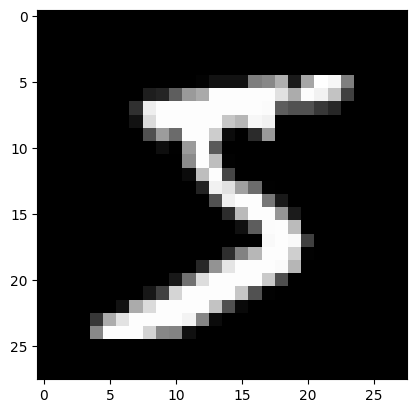

In [17]:
# 看看其中的数据是什么样的，这个本质上是一个灰色图
# 每一个数据是一个28*28的灰色图
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
# plt.show() # jupyter中可以不用这个，自动显示
print(train_data.train_data[0].numpy())

In [18]:
# 训练集要批量取得数据
import torch.utils.data as Data
batch_size=50                # pytorch是小批量训练,训练集总共是60000个数据，每个批次10个，那么会训练6000个批次。
# 训练集
train_loader = Data.DataLoader(
    dataset=train_data,      # 数据是这个训练集
    batch_size = batch_size, # 
    shuffle=True             # 是否乱序
)
# 测试集
test_loader = Data.DataLoader(
    dataset=train_data,      # 数据是这个训练集
    batch_size = batch_size, # 
    shuffle=True             # 是否乱序
)

## 构造模型
创建一个类，继承自nn.Module，我这里要创建卷积神经网络，卷积->激励->池化。 前置知识  
   - nn.Sequential : 中文意思是顺序，序贯，前一个的输出是后一个的输入。
   - nn.Conv2d     : 卷积
   - nn.ReLU       : 激励函数的一种
   - nn.MaxPool2d  : 池化中的最大化池化，
   - nn.AvgPool2d  : 池化中的平均池化
   - nn.Linear     : 全连接层
   - 卷积层输出尺寸计算 : $ (图像尺寸-卷积核尺寸 + 2*填充值)/步长+1 $
   - 池化层输出尺寸计算 : $ (图像尺寸-池化窗尺寸 + 2*填充值)/步长+1 $
   - view : 重构张量维度，-1表示自动计算

In [19]:
import torch.nn as nn

class CNN(nn.Module):
    # CNN网络，两个卷积+一个全连接层
    def __init__(self):
        super(CNN,self).__init__()
        # 先两个卷积
        self.conv1 = nn.Sequential(      # 输入的尺寸是1*28*28，最前面的1是channel层（通道），28*28是图像的。
            nn.Conv2d(                   # 二维卷积
                in_channels=1,           # 灰度图，单通道，所以是1
                out_channels=16,         # 输出16通道
                kernel_size=5,           # 卷积核
                stride=1,                # 步长，
                padding=2                # 填充值
            ),                           # 这个卷积的输出尺寸是=(28-5+2*2)/1+1=28，这个尺寸不变。16*28*28
            nn.ReLU(),                   # 激励函数
            nn.MaxPool2d(kernel_size=2)  # 池化层的输出尺寸(28-2+2*0)/2+1=14，默认的步长是卷积核大小 ,输出尺寸是16*14*14
        )
        self.conv2 = nn.Sequential(      # 输入尺寸是上一个的输出，
            nn.Conv2d(16,32,5,1,2),      # 输出尺寸=(14-5+2*2)/1+1=14,   32*14*14
            nn.ReLU(),                   # 激励函数
            nn.MaxPool2d(kernel_size=2)  # (14-2+2*0)/2+1=7   ,32*7*7
        )
        self.out = nn.Linear(32*7*7, 10) # ，全连接层，会将前面的32*7*7展平

    def forward(self, x):
        # 前向传播
        x = self.conv1(x)           # 第一次卷积
        x = self.conv2(x)           # 第二次卷积
        x = x.view(x.size(0), -1 )  # 重建维度，第一维是样本数量，第二个是自动计算，
        out = self.out(x)           # 全连接层，
        return out                  # 这个全连接层最后的输出是10，10个数字嘛

# 看看结果
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


# 训练
前面更新网路参数是 $ weight = weight - learning rate * gradient $，这里用优化器来做。

In [20]:
for step, (b_x, b_y) in enumerate(train_loader):
    print('结果标签的尺寸',b_y.size())  # 结果标签的尺寸
    print('结果标签的内容', b_y)         # 结果标签的内容
    output = cnn(b_x)
    print('计算结果标签的尺寸', output.size()) # 计算出的标签的尺寸
    print('结果看看第一个', output[0])        # 计算出的标签内容
    output2 = torch.max(output.data,1) # 
    print('取最大值后的结果',output2)
    print('可以看到output[0]是最大值，而output[1]是这个结果的索引,等同于数字')
    break # 只是运行一次，我看看相关的内容的

结果标签的尺寸 torch.Size([50])
结果标签的内容 tensor([8, 8, 6, 6, 8, 6, 3, 7, 8, 0, 8, 2, 6, 9, 7, 1, 8, 2, 2, 6, 7, 5, 1, 2,
        5, 4, 5, 2, 0, 2, 8, 3, 6, 8, 5, 8, 7, 5, 0, 8, 3, 6, 1, 2, 7, 4, 1, 3,
        9, 3])
计算结果标签的尺寸 torch.Size([50, 10])
结果看看第一个 tensor([-0.0441,  0.1166, -0.0025,  0.0037, -0.0670, -0.0080, -0.0397,  0.0594,
        -0.0768,  0.0118], grad_fn=<SelectBackward0>)
取最大值后的结果 torch.return_types.max(
values=tensor([0.1166, 0.0870, 0.1055, 0.1113, 0.0964, 0.1146, 0.1029, 0.0883, 0.0732,
        0.1066, 0.0901, 0.0842, 0.0738, 0.0788, 0.0856, 0.0804, 0.0914, 0.0999,
        0.1142, 0.0983, 0.0739, 0.0814, 0.1106, 0.0958, 0.0867, 0.1220, 0.1143,
        0.1152, 0.1029, 0.0717, 0.1008, 0.1106, 0.0996, 0.0714, 0.1295, 0.0855,
        0.0841, 0.0956, 0.1445, 0.0799, 0.1477, 0.1017, 0.1011, 0.1191, 0.1286,
        0.0599, 0.0768, 0.1327, 0.0794, 0.0658]),
indices=tensor([1, 1, 2, 2, 7, 2, 1, 2, 1, 1, 1, 1, 2, 2, 9, 2, 9, 7, 1, 2, 2, 1, 1, 7,
        1, 2, 1, 1, 1, 2, 7, 2, 1, 2, 2, 

In [21]:
EPOCH = 1 # 训练多少次
LR=0.001  # 学习率
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)  # 优化器，可以更新网络参数的
loss_func = nn.CrossEntropyLoss()                      # 交叉熵损失函数。这个标签是种类，跟数字大小是无关的。

for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(train_loader):
        # enumerate，内置函数，可以同时得到索引和值，(b_x, b_y)是每一次的值，就是x和y
        output = cnn(b_x)             # 计算值
        loss = loss_func(output, b_y) # 计算值和期望值之间的差是损失函数
        optimizer.zero_grad()         # 梯度归零
        loss.backward()               # 反向传播
        optimizer.step()              # 优化器更新参数
        if step % 100 == 0:           # 每xx次输出一下结果
            print(f'Epoch : {epoch} | train loss : {loss.data.numpy()} | size: {b_x.size()}')

Epoch : 0 | train loss : 2.314819574356079 | size: torch.Size([50, 1, 28, 28])
Epoch : 0 | train loss : 0.3925780951976776 | size: torch.Size([50, 1, 28, 28])
Epoch : 0 | train loss : 0.30686694383621216 | size: torch.Size([50, 1, 28, 28])
Epoch : 0 | train loss : 0.30315470695495605 | size: torch.Size([50, 1, 28, 28])
Epoch : 0 | train loss : 0.09859395772218704 | size: torch.Size([50, 1, 28, 28])
Epoch : 0 | train loss : 0.09164541959762573 | size: torch.Size([50, 1, 28, 28])
Epoch : 0 | train loss : 0.04324603080749512 | size: torch.Size([50, 1, 28, 28])
Epoch : 0 | train loss : 0.10685678571462631 | size: torch.Size([50, 1, 28, 28])
Epoch : 0 | train loss : 0.035537395626306534 | size: torch.Size([50, 1, 28, 28])
Epoch : 0 | train loss : 0.037453435361385345 | size: torch.Size([50, 1, 28, 28])
Epoch : 0 | train loss : 0.02328016236424446 | size: torch.Size([50, 1, 28, 28])
Epoch : 0 | train loss : 0.02439306490123272 | size: torch.Size([50, 1, 28, 28])


# 测试

In [22]:
correct = 0 # 正确的数量
for step, (b_x, b_y) in enumerate(train_loader):
    # 这里不需要更新参数
    with torch.no_grad():
        output = cnn(b_x)                            # 计算值
        output2 = torch.max(output.data,1)[1]        # 这个才是计算出的结果
        correct += (output2 == b_y).sum().item()     # output2 == b_y得到一个布尔数组(只有相同和不相同)，sum是计数
        if step % 100 == 0:                          # 每xx次就打印
            print(f'正确率:{100.0*correct/((step+1)*batch_size)}%')
        

正确率:98.0%
正确率:97.54455445544555%
正确率:97.61194029850746%
正确率:97.5813953488372%
正确率:97.60099750623442%
正确率:97.55688622754491%
正确率:97.60399334442596%
正确率:97.61768901569187%
正确率:97.64544319600499%
正确率:97.61820199778025%
正确率:97.61838161838162%
正确率:97.60581289736604%


到这里应该可以使用torch了吧

# 选读

## 模型
如下是可以用在模型中的
   - nn.Sequential : 一个容器，按顺序的，要求前一个的输出的尺寸跟后一个输入的尺寸相同。
   - nn.Conv1d     : 一维卷积，用于文本数据，只对宽度卷积，
   - nn.Conv2d     : 二维卷积，用于图像数据。
   - nn.Conv3d     : 三维卷积，用于视频数据。
   - nn.Linear     : 全连接，
   - nn.RNN        : 简单循环神经网络，网络的输出保存在一个记忆单元中，这个记忆单元和下一次的输入一起进入神经网络中。
   - nn.LSTM       : 长短时记忆网络，跟RNN的区别是，RNN只能短期依赖，而LSTM可以长期依赖。
   - nn.GRU        ：门控循环记忆网络，跟LSTM的区别是，不额外记忆状态，而是将记忆状态一起向后传递。

## 数据预处理
   - transform.ToTensor()            : 维度变换shape H，W，C ——> C，H，W，且将所有数除以255，将数据归一化到【0，1】
   - transforms.Normalize(mean,std)  : 正则化， $x=(x-mean)/std$ , 转成均值为0，标准差为1的。

## tensor的维度处理
   - view          : 重新设置维度
   - permute       : 维度更改顺序

## 损失函数

|名称|功能|擅长|备注|
|--|--|--|--|
|L1Loss|(L1损失)绝对值误差|回归任务||
|MSELoss(L2Loss)|(L2损失)均方误差|回归任务||
|SooothL1Loss|平滑L1损失|回归任务|L2Loss和L1Loss的结合|
|NLLLoss|负对数似然损失|分类任务||
|NLLLoss2D|负对数似然损失|分类任务|同上，一般用在图像上|
|CrossEntropyLoss|交叉熵|分类任务|是由nn.LogSoftmax()和nn.NLLLoss()组成|
|BCELoss||二分类任务|只适合二分类任务|
|BCEWithLogitsLoss||分类任务|Sigmoid和BCELoss合成一步|
|Focal Loss||二分类任务|只做二分类任务，解决难易样本数量不平衡|
|GHM Loss||分类任务|是Focal Loss的升级|
|MarginRankingLoss|计算2个向量之间的相似度|||
|MultiLabelMarginLoss|多标签分类|分类任务|一个样本可以同时有多个分类|
|SoftMarginLoss||二分类||



# 引用
   - [60分钟快速入门 PyTorch](https://zhuanlan.zhihu.com/p/66543791#:~:text=60%E5%88%86%E9%92%9F%E5%BF%AB%E9%80%9F%E5%85%A5%E9%97%A8%20PyTorch%201%201.%20Pytorch%20%E6%98%AF%E4%BB%80%E4%B9%88%20Pytorch%20%E6%98%AF%E4%B8%80%E4%B8%AA%E5%9F%BA%E4%BA%8E,...%208%201.3.2%20Numpy%20%E6%95%B0%E7%BB%84%E8%BD%AC%E6%8D%A2%E4%B8%BA%20Tensor%20...%20%E6%9B%B4%E5%A4%9A%E9%A1%B9%E7%9B%AE)
   - [DEEP LEARNING WITH PYTORCH: A 60 MINUTE BLITZ](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
   - [pytorch中归一化transforms.Normalize的真正计算过程](https://zhuanlan.zhihu.com/p/414242338)
   - [PyTorch 学习笔记（六）：PyTorch的十八个损失函数](https://zhuanlan.zhihu.com/p/61379965)